# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [52]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

 
X = np.array([[0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            

y = np.array([[0],
            [1],
            [1],
            [0]])

In [53]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

syn0_history = [syn0]
syn1_history = [syn1]
iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

In [54]:
syn0

array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855],
       [-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [42]:
for iter in range(50000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0)) # 兩格矩陣相乘
    l2 = nonlin(np.dot(l1,syn1)) 
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    l2_error = y - l2
    if iter%10000 == 0:
        print(f"第{iter}次", np.mean(l2_error))
    l2_delta = l2_error * nonlin(l2, deriv=True) # error * sigmold diff
    
    l1_error = l2_delta.dot(syn1.T) # 轉置syn1 因為要回推回去
    
    l1_delta = l1_error * nonlin(l1,True)
    
    # update weights
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
     # syn1 update weights
    
print("Output After Training:")
print(l1)

第0次 -0.012808938092813152
第10000次 -0.00016558715737343896
第20000次 -0.00010311761623568163
第30000次 -7.983111473818254e-05
第40000次 -6.712689335822706e-05
Output After Training:
[[7.18459682e-01 1.18215130e-01 9.25447077e-01 9.96941997e-01]
 [1.70079066e-01 4.11256160e-04 1.68033209e-02 8.95541924e-01]
 [9.95883261e-01 8.93354227e-01 2.25576274e-02 8.34372806e-01]
 [9.51045364e-01 2.50632357e-02 3.17728569e-05 1.16979851e-01]]


In [51]:
syn0_history[0]

array([[ 4.55174021,  4.13491648, -6.2876362 , -4.16999257],
       [-2.52190782, -5.78644401, -6.58800254, -3.63829223],
       [ 0.93683818, -2.00944394,  2.51876888,  5.78693669]])

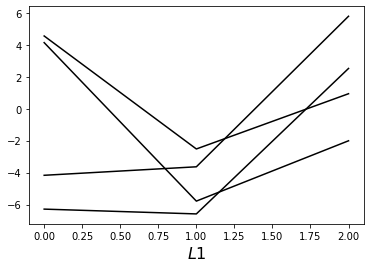

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

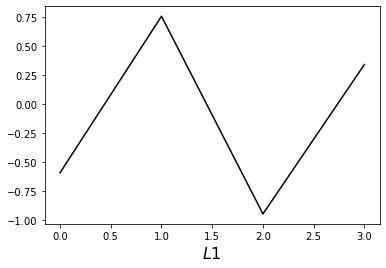

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn1_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()